## Features importance for SIPAIM paper

In this notebook we will test and compare the feature importances for Different classifiers using the A and B sets. We will also create a set Bprime with the same amount of features as A. 

In [21]:
# Loading libraries
import os, sys 
import numpy as np
from os import listdir, path
import math
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib as mplib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

In [2]:
def FeatureImportanceFromRF(XOrig,xTrain,yTrain,NForests):
    XOrig = XOrig.iloc[:,:-1]
    rf = RandomForestClassifier(n_estimators = NForests, min_samples_split = 2, n_jobs = -1, verbose = 1,random_state=1)
    rf.fit(xTrain, yTrain)
    IndexValues = list(range(len(XOrig.columns)))
    importances = pd.DataFrame({'name':XOrig.columns,'imp':rf.feature_importances_,
                                'index': IndexValues}).sort_values(['imp'], ascending = False).reset_index(drop = True)
    return importances

In [3]:
allFeaturesPath = r'/Users/roilhi/Documents/AllCSVPCGFeatures/'
MP = path.join(allFeaturesPath,'MP_PCGFeatures_PerCycle.csv')
MP2 = path.join(allFeaturesPath,'MP_LPCFeatures2.csv')

In [4]:
dataset_A = pd.read_csv(MP)
dataset_B = pd.read_csv(MP2)
XA, yA = dataset_A.iloc[:,:-1],dataset_A.iloc[:,-1]
XB, yB = dataset_B.iloc[:,:-1],dataset_B.iloc[:,-1]

In [5]:
NEstimators = 100
ImportancesA = FeatureImportanceFromRF(dataset_A,XA,yA,NEstimators)
ImportancesB = FeatureImportanceFromRF(dataset_B,XB,yB,NEstimators)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [6]:
ImportancesA

,imp,index,name
0,0.031909,27,atomFreq6
1,0.031118,78,LPC_Coefficient5
2,0.028992,77,LPC_Coefficient4
3,0.025631,32,atomFreq7
4,0.023294,22,atomFreq5
5,0.022385,75,LPC_Coefficient2
6,0.021442,82,LPC_Coefficient9
7,0.021299,62,atomFreq13
8,0.019869,83,LPC_Coefficient10
9,0.017701,12,atomFreq3


In [7]:
ImportancesB

,imp,index,name
0,0.091872,9,LPC_Coefficient5
1,0.077815,6,LPC_Coefficient2
2,0.062916,5,LPC_Coefficient1
3,0.060040,12,LPC_Coefficient8
4,0.055299,8,LPC_Coefficient4
5,0.053568,10,LPC_Coefficient6
6,0.052191,11,LPC_Coefficient7
7,0.050244,4,DecayRatioCycle
8,0.049716,14,LPC_Coefficient10
9,0.048867,7,LPC_Coefficient3


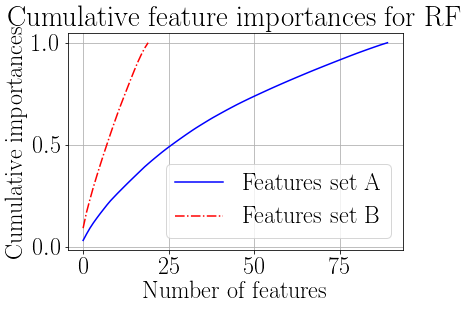

In [47]:
# List of features sorted from most to least important
cumulative_importancesA = np.cumsum(ImportancesA.iloc[:,0])
cumulative_importancesB = np.cumsum(ImportancesB.iloc[:,0])
# Make a line graph
x_valuesA = list(range(len(ImportancesA.iloc[:,1])))
x_valuesB = list(range(len(ImportancesB.iloc[:,1])))
#----------------------------------------------------------------------------
fig, ax = plt.subplots()
plt.rc('text', usetex=True)
plt.rc('font',family='serif')
plt.rc('font',**{'family':'serif','serif':['Arial']})
plt.plot(x_valuesA, cumulative_importancesA, 'b-')
plt.plot(x_valuesB, cumulative_importancesB,'r-.')
# Draw line at 95% of importance retained
#plt.hlines(y = 0.95, xmin=0, xmax=len(ImportancesA.iloc[:,0]), color = 'g', linestyles = 'dashed')
# Format x ticks and labels
#plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Number of features'); plt.ylabel('Cumulative importances'); plt.title('Cumulative feature importances for RF');
plt.legend(['Features set A','Features set B'])
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 24}

mplib.rc('font', **font)
plt.bar(data[0], data[1], width=5)
plt.grid(True)
plt.grid()
plt.show()

In [48]:
# Save the first plot into a pdf file
fig.set_size_inches(11, 9)
ax.get_figure().savefig('/Users/roilhi/Desktop/CumImportances.pdf', dpi=100) 
plt.close(fig)